In [106]:
#sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.


from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [197]:
#diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

df_x=diabetes['data']
df_y=diabetes['target']
print(df_x.shape)


(442, 10)


In [140]:
#df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.
#df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

import numpy as np

X=np.array(df_x)
y=np.array(df_y)

In [141]:
#X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

#print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(111, 10) (111,)


In [158]:
#입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.


W = np.random.rand(10)
b = np.random.rand()

print(W,b)

[0.2032162  0.25578892 0.41136849 0.73582518 0.19603865 0.10301183
 0.60716486 0.09058073 0.41751625 0.01788665] 0.036901330983055036


In [159]:
#모델 함수를 구현해주세요.

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [160]:
#손실함수를 MSE 함수로 정의해주세요.

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


In [161]:
#기울기를 구하는 gradient 함수 구현하기

def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -60.68952616  -13.86456242 -189.71778079 -142.7121257   -68.46431166
  -56.22043706  127.82188585 -139.26299113 -183.03972774 -123.69675859]
db: -304.1931656638257


In [162]:
#학습률, learning rate 를 설정해주세요
#만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

LEARNING_RATE = 0.01



In [163]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 4715.4072
Iteration 200 : Loss 3719.7050
Iteration 300 : Loss 3426.0441
Iteration 400 : Loss 3262.4044
Iteration 500 : Loss 3157.4613
Iteration 600 : Loss 3085.6123
Iteration 700 : Loss 3034.8281
Iteration 800 : Loss 2998.3817
Iteration 900 : Loss 2972.0373
Iteration 1000 : Loss 2952.9398


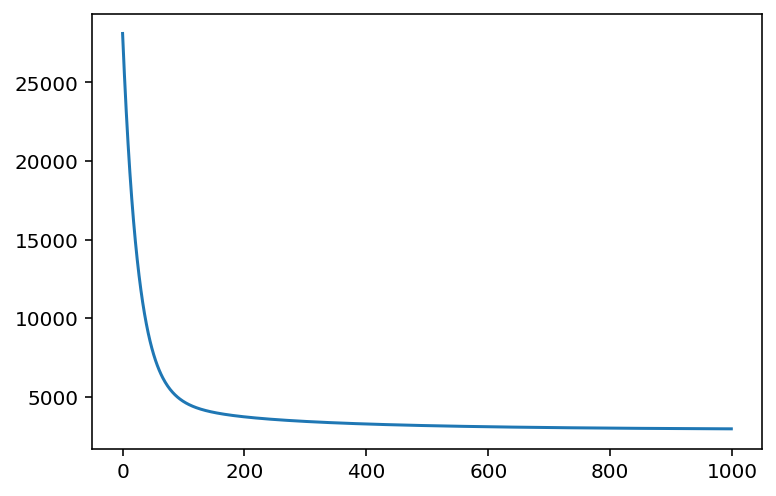

In [180]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(losses)
plt.show()

In [181]:

print(W)
print(b)

[   3.02353682 -149.41804147  494.67893485  272.25298962  -13.03806169
  -67.7623883  -178.04501404  109.76026214  331.47274679  114.39622494]
152.3604586011939


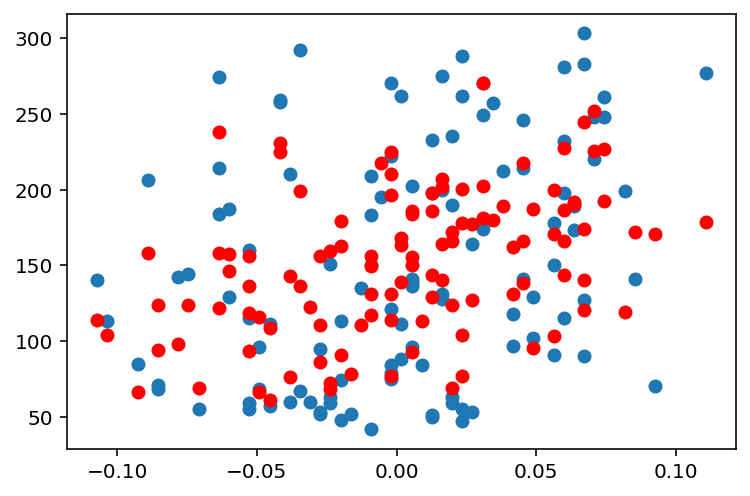

In [182]:
import numpy as np

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)



# 모델 일차함수 그리기
#X_ = np.linspace(1, 1, 1)
#y = model(X_train, W, b)
#X_ = np.linspace(0, 8, 9)
#y_ = model(X_, W, b)

#plt.plot(y_)

# 실제 데이터 값
plt.scatter(X_test[:, 0], y_test)

# 모델이 예측한 값
plt.scatter(X_test[:, 0], prediction,c='r')
plt.show()